In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('AirBnB_NY/AB_NYC_2019.csv')

In [8]:
listings_count = df['neighbourhood_group'].value_counts() # Listings count by every neighbourhood group:
print(listings_count)

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64


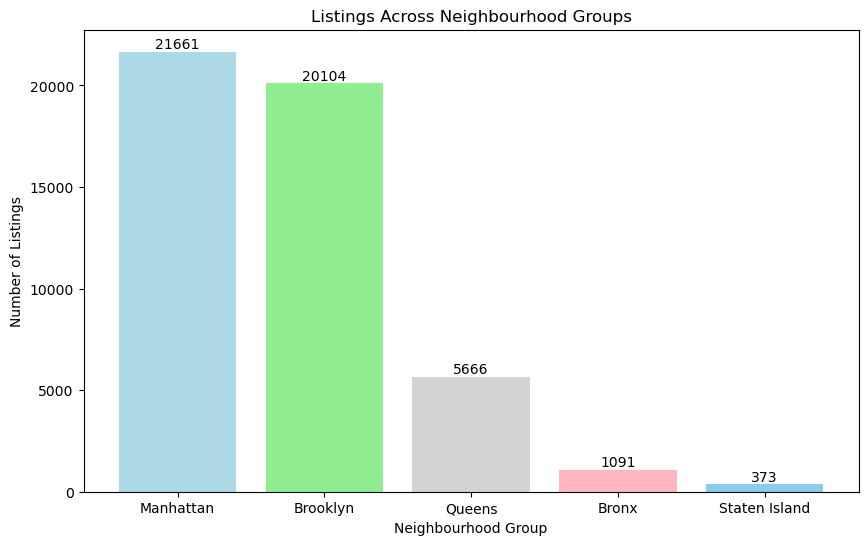

In [9]:
# - Plot: Create a bar plot to show the distribution of listings across different
# neighbourhood_group.
# - Details: Label each bar with the count of listings, use distinct colors for each
# neighborhood group, and add titles and axis labels.

# Create a bar plot
plt.figure(figsize=(10, 6))

# Use distinct colors for each bar
colors = ['lightblue', 'lightgreen', 'lightgrey', 'lightpink', 'skyblue']

bars = plt.bar(listings_count.index, listings_count.values, color=colors)

# Add titles and labels
plt.title('Listings Across Neighbourhood Groups')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Listings')


# Add labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom')

# Show the plot
plt.show()

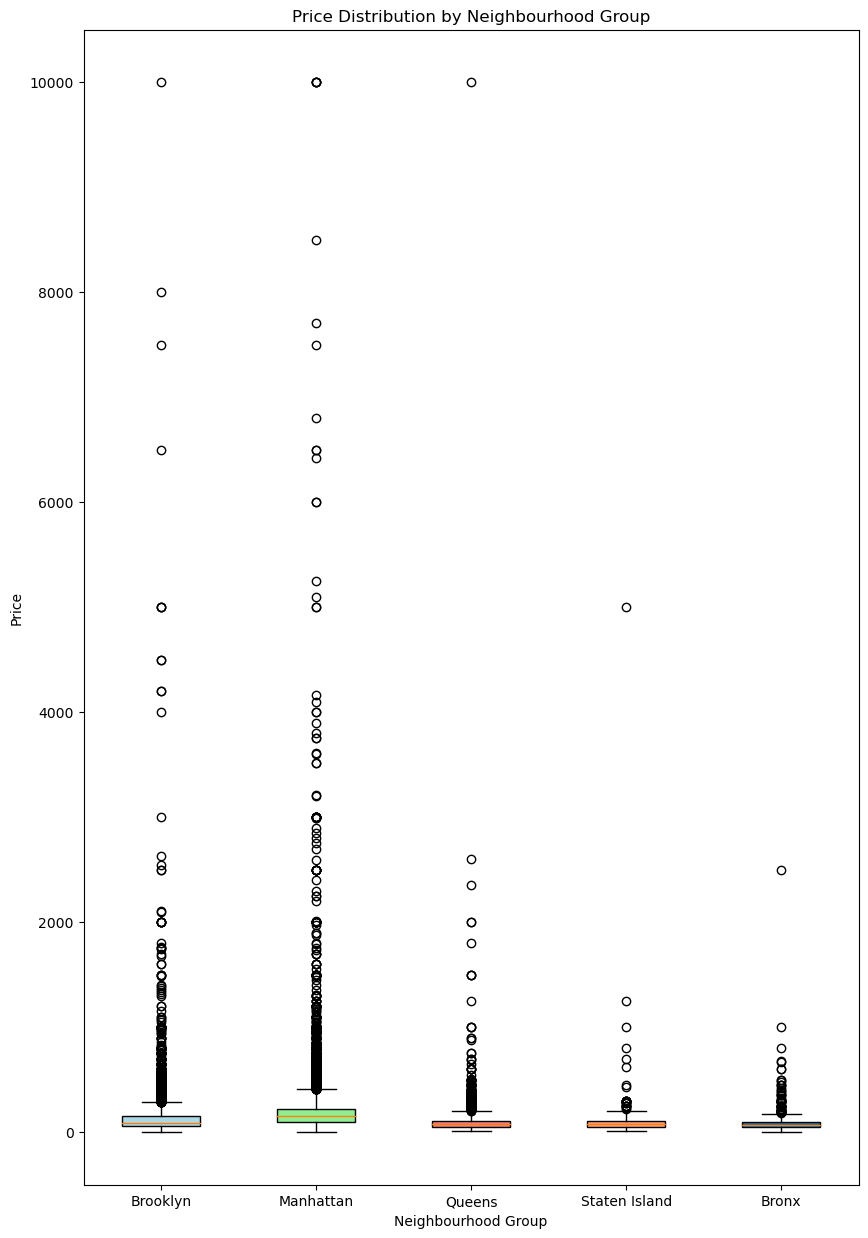

In [10]:
# - Plot: Generate a box plot to display the distribution of price within each
# neighbourhood_group.
# - Details: Use different colors for the box plots, highlight outliers, and add
# appropriate titles and axis labels.

# Define colors for each neighborhood group
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightsalmon']

# Prepare the data for the boxplot
data_to_plot = [df[df['neighbourhood_group'] == group]['price'] for group in df['neighbourhood_group'].unique()]

# Create the box plot
plt.figure(figsize=(10, 15))
box = plt.boxplot(data_to_plot,
                  patch_artist=True,
                  labels=df['neighbourhood_group'].unique()
                 )

# Color each box differently
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Add titles and labels
plt.title('Price Distribution by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price')

# Show the plot
plt.show()

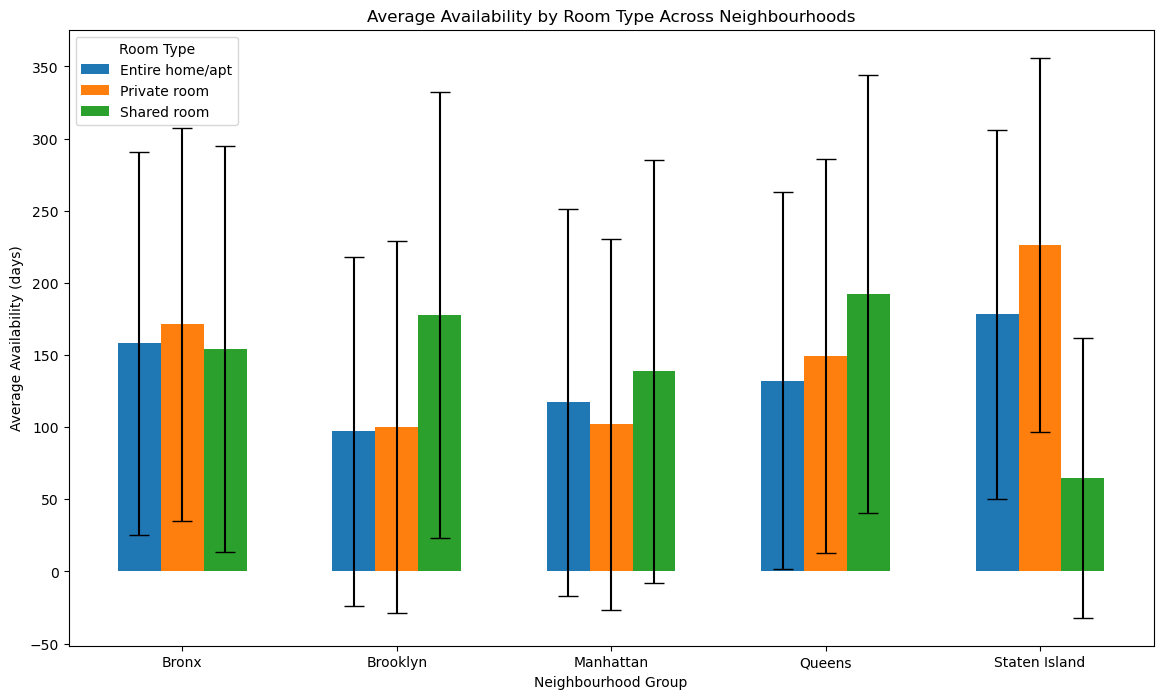

In [11]:
# - Plot: Create a grouped bar plot to show the average availability_365 for each
# room_type across the neighborhoods.
# - Details: Include error bars to indicate the standard deviation, use different colors
# for room types, and add titles and axis labels.

# Calculate mean of availability_365 for each room_type across neighbourhood_group
import numpy as np

grouped_df = df.groupby(['neighbourhood_group', 'room_type']).agg(mean_availability=('availability_365', 'mean'),
                                                                  std_availability=('availability_365', 'std')
).reset_index()

# Set up the figure and axes
plt.figure(figsize=(14, 8))

# Get unique values for neighborhoods and room types
neighbourhoods = grouped_df['neighbourhood_group'].unique()
room_types = grouped_df['room_type'].unique()

# Define bar width and positions
bar_width = 0.2
index = np.arange(len(neighbourhoods))  #[0 1 2 3 4] identify how many blocks of bars will be present, how many neighbourgroups

# Create bars for each room type
for i, room_type in enumerate(room_types): #0 Entire home/apt, 1 Private room, 2 Shared room
    subset = grouped_df[grouped_df['room_type'] == room_type]
    plt.bar(index + i * bar_width,         # x
            subset['mean_availability'],   # y
            yerr=subset['std_availability'],    #error bar
            width=bar_width,
            label=room_type,
            capsize=7)  # Adds caps to the error bars

# Add titles and labels
plt.title('Average Availability by Room Type Across Neighbourhoods')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Availability (days)')
plt.xticks(index + bar_width, neighbourhoods)  # Add lables to the x axis (neighbourhoods)
plt.legend(title='Room Type')

plt.show()

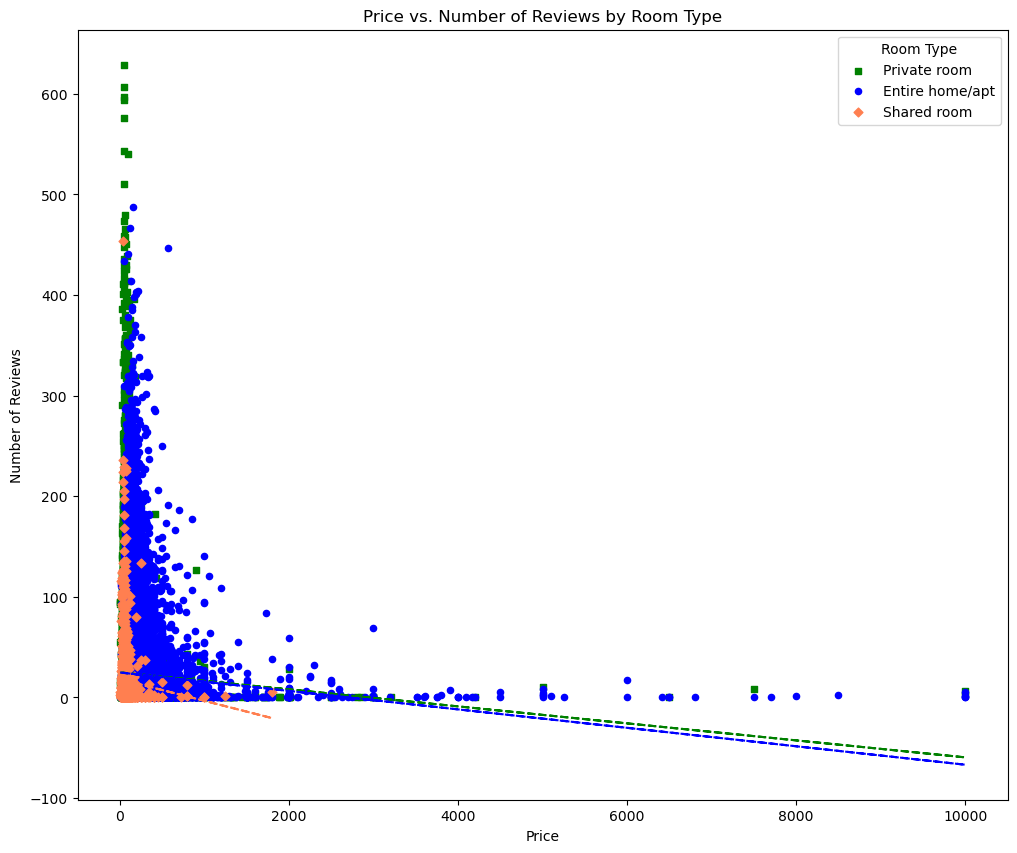

In [12]:
# - Plot: Develop a scatter plot with price on the x-axis and number_of_reviews on the
# y-axis.
# - Details: Differentiate points by room_type using color or marker style, add a
# regression line to identify trends, and include a legend, titles, and axis labels.

# Define colors and markers for each room type
colors = {'Entire home/apt': 'blue', 'Private room': 'green', 'Shared room': 'coral'}
markers = {'Entire home/apt': 'o', 'Private room': 's', 'Shared room': 'D'}

plt.figure(figsize = (12, 10))


room_types = df['room_type'].unique()

for room_type in room_types:
    subset = df[df['room_type'] == room_type]
    plt.scatter(subset['price'], 
                subset['number_of_reviews'], 
                color = colors[room_type], 
                marker = markers[room_type],
                label=room_type,
                s = 20
                
               )
    
    # Add a regression line for each room type
    slope, intercept = np.polyfit(subset['price'], subset['number_of_reviews'], 1)
    plt.plot(subset['price'], slope * subset['price'] + intercept, color=colors[room_type], linestyle='--')

plt.title('Price vs. Number of Reviews by Room Type')
plt.xlabel('Price')
plt.ylabel('Number of Reviews')
plt.legend(title='Room Type')

plt.show()

In [13]:
# - Plot: Create a line plot to show the trend of number_of_reviews over time
# (last_review) for each neighbourhood_group.
# - Details: Use different colors for each neighborhood group, smooth the data with a
# rolling average, and add titles, axis labels, and a legend.

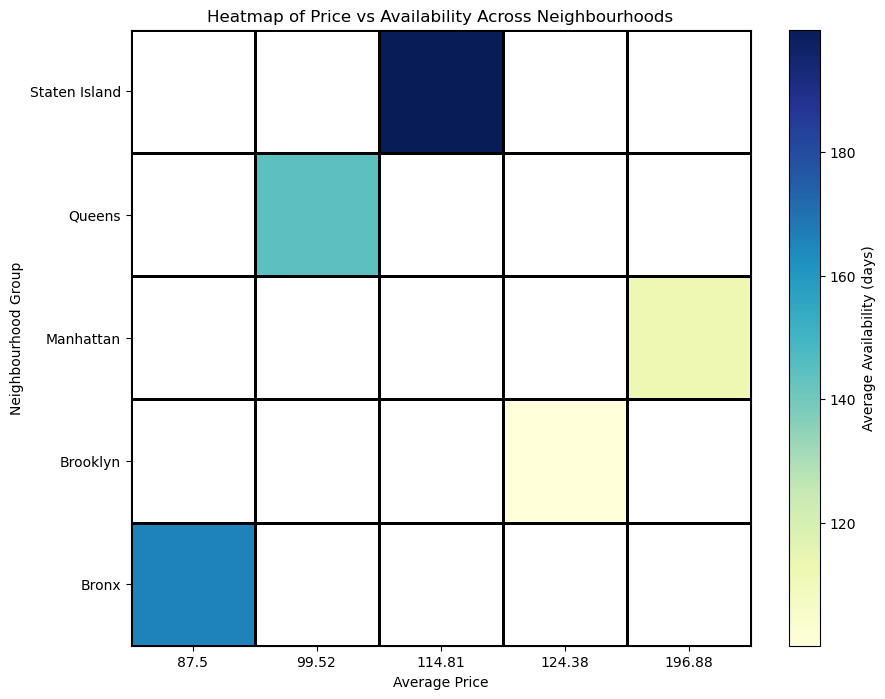

In [14]:
# - Plot: Generate a heatmap to visualize the relationship between price and
# availability_365 across different neighborhoods.
# - Details: Use a color gradient to represent the intensity of the relationship, label the
# axes, and include a color bar for reference.

# Calculate the mean price and availability_365 for each neighbourhood_group
heatmap_data = df.groupby('neighbourhood_group').agg({
    'price': 'mean',
    'availability_365': 'mean'
}).reset_index()

heatmap_data['price'] = heatmap_data['price'].round(2)

# Pivot the data to create a matrix for the heatmap
heatmap_data_pivot = heatmap_data.pivot(index = 'neighbourhood_group', columns = 'price', values = 'availability_365')

# Create the heatmap using matplotlib
plt.figure(figsize=(10, 8))

# Use the pcolormesh function to create the heatmap
plt.pcolormesh(heatmap_data_pivot, cmap='YlGnBu', edgecolors='black', shading='auto')

# Add color bar for reference
plt.colorbar(label='Average Availability (days)')

# Label the axes
plt.title('Heatmap of Price vs Availability Across Neighbourhoods')
plt.xlabel('Average Price')
plt.ylabel('Neighbourhood Group')

# Adjust the ticks for x and y axis
plt.xticks(np.arange(0.5, len(heatmap_data_pivot.columns), 1), heatmap_data_pivot.columns) #allign on center lables axis x
plt.yticks(np.arange(0.5, len(heatmap_data_pivot.index), 1), heatmap_data_pivot.index)  # allign on center lables axis y

plt.show()


room_type            Entire home/apt  Private room  Shared room
neighbourhood_group                                            
Bronx                          11627         16312          432
Brooklyn                      267128        213653         5793
Manhattan                     235147        209150        10272
Queens                         60644         93561         2745
Staten Island                   5857          5670           14


<Figure size 1000x800 with 0 Axes>

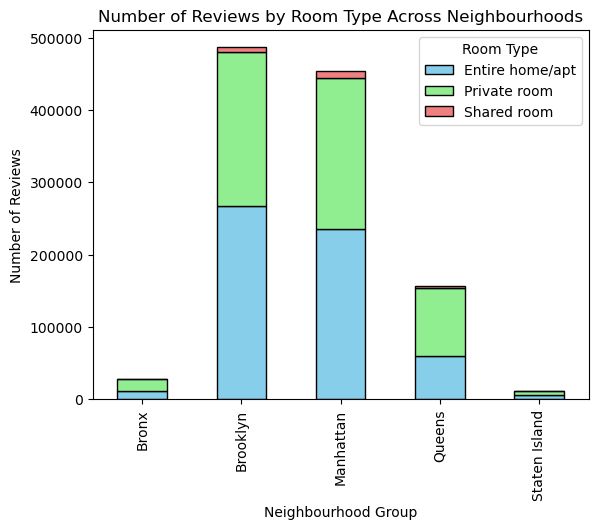

In [15]:
# - Plot: Create a stacked bar plot to display the number_of_reviews for each
# room_type across the neighbourhood_group.
# - Details: Stack the bars by room type, use different colors for each room type, and
# add titles, axis labels, and a legend.

pivot_df = df.pivot_table(index='neighbourhood_group', columns='room_type', values='number_of_reviews', aggfunc='sum', fill_value=0)
print(pivot_df)

plt.figure(figsize=(10, 8))

# Define colors for each room type
colors = ['skyblue', 'lightgreen', 'lightcoral']

# Plot the stacked bar chart
pivot_df.plot(kind='bar', stacked=True, color=colors, edgecolor='black')

# Add titles and labels
plt.title('Number of Reviews by Room Type Across Neighbourhoods')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Reviews')
plt.legend(title='Room Type')

plt.show()